<center><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300"></center><br/>

# Assignment: Notebook for Peer Assignment

Estimated time needed: 60 minutes


# Assignment Scenario

Congratulations! You have just been hired by a US Weather forecast firm as a data scientist.

The company is considering the weather condition to help predict the possibility of precipitations, which involves using various local climatological variables, including temperature, wind speed, humidity, dew point, and pressure. The data you will be handling was collected by a NOAA weather station located at the John F. Kennedy International Airport in Queens, New York.

Your task is to provide a high level analysis of weather data in JFK Airport. Your stakeholders want to understand the current and historical record of precipitations based on different variables. For now they are mainly interested in a macro-view of JFK Airport Weather, and how it relates to the possibility to rain because it will affect flight delays and etc.


# Introduction

This project relates to the NOAA Weather Dataset - JFK Airport (New York). The original dataset contains 114,546 hourly observations of 12 local climatological variables (such as temperature and wind speed) collected at JFK airport. This dataset can be obtained for free from the IBM Developer [Data Asset Exchange](https://developer.ibm.com/exchanges/data/all/jfk-weather-data/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0151ENSkillsNetwork926-2022-01-01). 

For this project, you will be using a subset dataset, which contains 5727 rows (about 5% or original rows) and 9 columns. The end goal will be to predict the precipitation using some of the available features. In this project, you will practice reading data files, preprocessing data, creating models, improving models and evaluating them to ultimately choose the best model.




## Table of Contents:

Using this R notebook you will complete **10 tasks**:
* [0. Import Modules](#cell0)
* [1. Download and Unzip NOAA Weather Dataset](#cell1)
* [2. Read Dataset into Project](#cell2)
* [3. Select Subset of Columns](#cell3)
* [4. Clean Up Columns](#cell4)
* [5. Convert Columns to Numerical Types](#cell5)
* [6. Rename Columns](#cell6)
* [7. Exploratory Data Analysis](#cell7)
* [8. Linear Regression](#cell8)
* [9. Improve the Model](#cell9)
* [10. Find Best Model](#cell10)


<a id="cell0"></a>
## 0. Import required modules

Below, install "tidymodels", additionally "rlang" should be updated in order to properly run "tidymodels". 


In [ ]:
# Install tidymodels if you haven't done so
#install.packages("rlang")
#install.packages("tidymodels")

**Note: After installing the packages, restart the kernel. Without installing the packages again, load them. Tidyverse and Tidymodels will be the two main packages you will use.**


In [1]:
# Library for modeling
library(tidymodels)

# Load tidyverse
library(tidyverse)

── Attaching packages ────────────────────────────────────── tidymodels 0.1.0 ──
✔ broom     0.5.6      ✔ recipes   0.1.12
✔ dials     0.0.6      ✔ rsample   0.0.5 
✔ dplyr     0.8.5      ✔ tibble    3.0.1 
✔ ggplot2   3.3.0      ✔ tune      0.1.0 
✔ infer     0.5.1      ✔ workflows 0.1.1 
✔ parsnip   0.1.0      ✔ yardstick 0.0.6 
✔ purrr     0.3.4      
── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard()  masks scales::discard()
✖ dplyr::filter()   masks stats::filter()
✖ dplyr::lag()      masks stats::lag()
✖ ggplot2::margin() masks dials::margin()
✖ recipes::step()   masks stats::step()
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ readr   1.3.1     ✔ forcats 0.5.0
✔ stringr 1.4.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::col_factor() masks scales::col_factor()
✖ purrr::discard()    masks scales::discard()
✖ dplyr::filter()     masks stats::filter


### Understand the Dataset

The original NOAA JFK dataset contains 114,546 hourly observations of various local climatological variables (including temperature, wind speed, humidity, dew point, and pressure). 

In this project you will use a sample dataset, which is around 293 KB. [Link to the sample dataset](https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/noaa-weather-sample-data.tar.gz).

The sample contains 5727 rows (about 5% or original rows) and 9 columns, which are:
- DATE
- HOURLYDewPointTempF
- HOURLYRelativeHumidity
- HOURLYDRYBULBTEMPF
- HOURLYWETBULBTEMPF
- HOURLYPrecip
- HOURLYWindSpeed
- HOURLYSeaLevelPressure
- HOURLYStationPressure

The original dataset is much bigger. Feel free to explore the original dataset. [Link to the original dataset.](https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/noaa_weather.html) 

For more information about the dataset, checkout the [preview](https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/data-preview/index.html?_ga=2.176781478.281508226.1616293518-1509963377.1616117067&cm_mc_uid=90945889198916153255549&cm_mc_sid_50200000=64650651616293516933) of NOAA Weather - JFK Airport.


<a id="cell1"></a>

## 1. Download NOAA Weather Dataset

Use the `download.file()` function to download the sample dataset from the URL below.

URL = 'https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/noaa-weather-sample-data.tar.gz'


In [2]:
# url
url = 'https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/noaa-weather-sample-data.tar.gz'
# download the file
download.file(url, destfile = "noaa-weather-sample-data.tar.gz")


Untar the zipped file.


In [3]:
# untar the file so we can get the csv only
# if you run this on your local machine, then can remove tar = "internal" 
untar("noaa-weather-sample-data.tar.gz", tar = "internal")


Warning message in untar2(tarfile, files, list, exdir, restore_times):
“using pax extended headers”

<a id="cell2"></a>
## 2. Extract and Read into Project
We start by reading in the raw dataset. You should specify the file name as "noaa-weather-sample-data/jfk_weather_sample.csv".


In [4]:
# read_csv only 
sub_noaaweather <- read_csv("noaa-weather-sample-data/jfk_weather_sample.csv",
                     col_types = cols('DivDistance' = col_number(), 
                                      'DivArrDelay' = col_number()))

Warning message:
“The following named parsers don't match the column names: DivDistance, DivArrDelay”Warning message:
“1 parsing failure.
 row                 col               expected actual                                              file
1443 HOURLYDewPointTempF no trailing characters      s 'noaa-weather-sample-data/jfk_weather_sample.csv'
”

Next, display the first few rows of the dataframe.


In [5]:
head(sub_noaaweather)

DATE,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYPrecip,HOURLYWindSpeed,HOURLYSeaLevelPressure,HOURLYStationPressure
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
2015-07-25 13:51:00,60,46,83,68,0.00,13,30.01,29.99
2016-11-18 23:51:00,34,48,53,44,0.00,6,30.05,30.03
2013-01-06 08:51:00,33,89,36,35,0.00,13,30.14,30.12
2011-01-27 16:51:00,18,48,36,30,0.00,14,29.82,29.80
2015-01-03 12:16:00,27,61,39,34,T,11,NA,30.50
2013-02-15 20:51:00,35,79,41,38,0.00,6,29.94,29.92


Also, take a `glimpse` of the dataset to see the different column data types and make sure it is the correct subset dataset with about 5700 rows and 9 columns.


In [6]:
dim(sub_noaaweather)

[1] 5727    9

In [7]:
glimpse(sub_noaaweather)

Rows: 5,727
Columns: 9
$ DATE                   <dttm> 2015-07-25 13:51:00, 2016-11-18 23:51:00, 201…
$ HOURLYDewPointTempF    <dbl> 60, 34, 33, 18, 27, 35, 4, 14, 51, 71, 76, 19,…
$ HOURLYRelativeHumidity <dbl> 46, 48, 89, 48, 61, 79, 51, 65, 90, 94, 79, 37…
$ HOURLYDRYBULBTEMPF     <dbl> 83, 53, 36, 36, 39, 41, 19, 24, 54, 73, 83, 44…
$ HOURLYWETBULBTEMPF     <dbl> 68, 44, 35, 30, 34, 38, 15, 21, 52, 72, 78, 35…
$ HOURLYPrecip           <chr> "0.00", "0.00", "0.00", "0.00", "T", "0.00", "…
$ HOURLYWindSpeed        <dbl> 13, 6, 13, 14, 11, 6, 0, 11, 11, 5, 21, 7, 17,…
$ HOURLYSeaLevelPressure <dbl> 30.01, 30.05, 30.14, 29.82, NA, 29.94, 30.42, …
$ HOURLYStationPressure  <dbl> 29.99, 30.03, 30.12, 29.80, 30.50, 29.92, 30.4…


<a id="cell3"></a>
## 3. Select Subset of Columns

The end goal of this project will be to predict `HOURLYprecip` (precipitation) using a few other variables. Before you can do this, you first need to preprocess the dataset. Section 3 to section 6 focuses on preprocessing.

The first step in preprocessing is to select a subset of data columns and inspect the column types.

The key columns that we will explore in this project are:
- HOURLYRelativeHumidity
- HOURLYDRYBULBTEMPF
- HOURLYPrecip
- HOURLYWindSpeed
- HOURLYStationPressure

Data Glossary:
- 'HOURLYRelativeHumidity' is the relative humidity given to the nearest whole percentage.
- 'HOURLYDRYBULBTEMPF' is the dry-bulb temperature and is commonly used as the standard air temperature reported. It is given here in whole degrees Fahrenheit.
- 'HOURLYPrecip' is the amount of precipitation in inches to hundredths over the past hour. For certain automated stations, precipitation will be reported at sub-hourly intervals (e.g. every 15 or 20 minutes) as an accumulated amount of all precipitation within the preceding hour. A “T” indicates a trace amount of precipitation.
- 'HOURLYWindSpeed' is the speed of the wind at the time of observation given in miles per hour (mph).
- 'HOURLYStationPressure' is the atmospheric pressure observed at the station during the time of observation. Given in inches of Mercury (in Hg).

`Select` those five columns and store the modified dataframe as a new variable.


In [8]:
new_weather <- select(sub_noaaweather, c(HOURLYRelativeHumidity, HOURLYDRYBULBTEMPF, HOURLYPrecip, 
                                        HOURLYWindSpeed, HOURLYStationPressure))

Show the first 10 rows of this new dataframe.


In [9]:
head(new_weather, 10)

HOURLYRelativeHumidity,HOURLYDRYBULBTEMPF,HOURLYPrecip,HOURLYWindSpeed,HOURLYStationPressure
<dbl>,<dbl>,<chr>,<dbl>,<dbl>
46,83,0.00,13,29.99
48,53,0.00,6,30.03
89,36,0.00,13,30.12
48,36,0.00,14,29.80
61,39,T,11,30.50
79,41,0.00,6,29.92
51,19,0.00,0,30.40
65,24,0.00,11,30.35
90,54,0.06,11,30.03


<a id="cell4"></a>
## 4. Clean Up Columns

From the dataframe preview above, we can see that the column `HOURLYPrecip` - which is the hourly measure of precipitation levels - contains both `NA` and `T` values. `T` specifies *trace amounts of precipitation* (meaning essentially no precipitation), while `NA` means *not available*, and is used to denote missing values. Additionally, some values also have "s" at the end of them, indicating that the precipitation was snow. 

Inspect the unique values present in the column `HOURLYPrecip` (with `unique(dataframe$column)`) to see these values.


In [10]:
unique(new_weather$HOURLYPrecip)

[1] "0.00"  "T"     "0.06"  NA      "0.03"  "0.02"  "0.08"  "0.01"  "0.07" 
[10] "0.16"  "0.09"  "0.22"  "0.02s" "0.24"  "0.18"  "0.05"  "0.04"  "0.09s"
[19] "0.11"  "0.14"  "0.25"  "0.10"  "0.01s" "0.58"  "0.12"  "0.13"  "0.46" 
[28] "1.07"  "1.19"  "0.34"  "0.20"  "0.36s" "0.42"  "0.17"  "0.27"  "0.35" 
[37] "0.31"  "0.33"  "0.23"  "0.26"  "0.28"  "0.75"  "0.19"  "0.36"  "0.03s"
[46] "0.07s" "0.54"  "0.59"  "0.21"

Having characters in values (like the "T" and "s" that you see in the unique values) will cause problems when you create a model because values for precipitation should be numerical. So you need to fix these values that have characters. 

Now, for the column `HOURLYPrecip`:
1. Replace all the `T` values with "0.0" and 
2. Remove "s" from values like "0.02s". In R, you can use the method `str_remove(column, pattern = "s$")` to remove the character "s" from the end of values. The "$" tells R to match to the end of values. The `pattern` is a regex pattern. Look at [here](https://www.rdocumentation.org/packages/stringi/versions/1.5.3/topics/about_search_regex?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0151ENSkillsNetwork926-2022-01-01) for more information about regex and matching to strings in R.

Remember that you can use `tidyverse`'s  `mutate()` to update columns.

You can check your work by checking if unique values of `HOURLYPrecip` still contain any `T` or `s`. Store the modified dataframe as a new variable.


In [11]:
replaced_weather <- new_weather %>%
    mutate(HOURLYPrecip = str_replace(HOURLYPrecip, "T", "0.0"), HOURLYPrecip = str_remove(HOURLYPrecip, "s$"))
unique(replaced_weather$HOURLYPrecip)

[1] "0.00" "0.0"  "0.06" NA     "0.03" "0.02" "0.08" "0.01" "0.07" "0.16"
[11] "0.09" "0.22" "0.24" "0.18" "0.05" "0.04" "0.11" "0.14" "0.25" "0.10"
[21] "0.58" "0.12" "0.13" "0.46" "1.07" "1.19" "0.34" "0.20" "0.36" "0.42"
[31] "0.17" "0.27" "0.35" "0.31" "0.33" "0.23" "0.26" "0.28" "0.75" "0.19"
[41] "0.54" "0.59" "0.21"

<a id="cell5"></a>
## 5. Convert Columns to Numerical Types
Now that you have removed the characters in the `HOURLYPrecip` column, you can safely covert the column to a numeric type.

First, check the types of the columns. You will notice that all are `dbl` (double or numeric) except for `HOURLYPrecip`, which is `chr` (character or string). Use the `glimpse` function from Tidyverse.


In [12]:
glimpse(replaced_weather)

Rows: 5,727
Columns: 5
$ HOURLYRelativeHumidity <dbl> 46, 48, 89, 48, 61, 79, 51, 65, 90, 94, 79, 37…
$ HOURLYDRYBULBTEMPF     <dbl> 83, 53, 36, 36, 39, 41, 19, 24, 54, 73, 83, 44…
$ HOURLYPrecip           <chr> "0.00", "0.00", "0.00", "0.00", "0.0", "0.00",…
$ HOURLYWindSpeed        <dbl> 13, 6, 13, 14, 11, 6, 0, 11, 11, 5, 21, 7, 17,…
$ HOURLYStationPressure  <dbl> 29.99, 30.03, 30.12, 29.80, 30.50, 29.92, 30.4…


Convert `HOURLYPrecip` to the `numeric` type and store the cleaned dataframe as a new variable.


In [13]:
cleaned_weatherdf <- transform(replaced_weather, HOURLYPrecip = as.numeric(HOURLYPrecip))

We can now see that all fields have numerical data type.


In [14]:
sapply(cleaned_weatherdf, class)

HOURLYRelativeHumidity     HOURLYDRYBULBTEMPF           HOURLYPrecip 
             "numeric"              "numeric"              "numeric" 
       HOURLYWindSpeed  HOURLYStationPressure 
             "numeric"              "numeric"

<a id="cell6"></a>
## 6. Rename Columns
Let's rename the following columns as:
- 'HOURLYRelativeHumidity' to 'relative_humidity'
- 'HOURLYDRYBULBTEMPF' to 'dry_bulb_temp_f'
- 'HOURLYPrecip' to 'precip'
- 'HOURLYWindSpeed' to 'wind_speed'
- 'HOURLYStationPressure' to 'station_pressure'

You can use `dplyr::rename()`. Then, store the final dataframe as a new variable.


In [15]:
renamed_weather <- cleaned_weatherdf %>%
dplyr::rename(relative_humidity = HOURLYRelativeHumidity, dry_bulb_temp_f = HOURLYDRYBULBTEMPF,
              precip = HOURLYPrecip, wind_speed = HOURLYWindSpeed, station_pressure = HOURLYStationPressure)

head(renamed_weather)

,relative_humidity,dry_bulb_temp_f,precip,wind_speed,station_pressure
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,46,83,0,13,29.99
2,48,53,0,6,30.03
3,89,36,0,13,30.12
4,48,36,0,14,29.80
5,61,39,0,11,30.50
6,79,41,0,6,29.92


<a id="cell7"></a>
## 7. Exploratory Data Analysis
Now that you have finished preprocessing the dataset, you can can start exploring the columns more.

First, split the data into a training and testing set. Splitting a dataset is done randomly, so to have reproducible results set the seed = 1234. Also, use 80% of the data for training.


In [16]:
set.seed(42) # because it is the meaning of life, the universe and everything else

split_dataset <- initial_split(renamed_weather, prop = 0.8)
train_data <- training(split_dataset)
test_data <- testing(split_dataset)

Next, looking at just the **training set**, plot histograms or box plots of the variables (`relative_humidity`, `dry_bulb_temp_f`, `precip`, `wind_speed`,  `station_pressure`) for an intial look of their distributions using `tidyverse`'s `ggplot`. Leave the testing set as is because it is good practice to not see the testing set until evaluating the final model.


Warning message:
“Removed 125 rows containing non-finite values (stat_bin).”

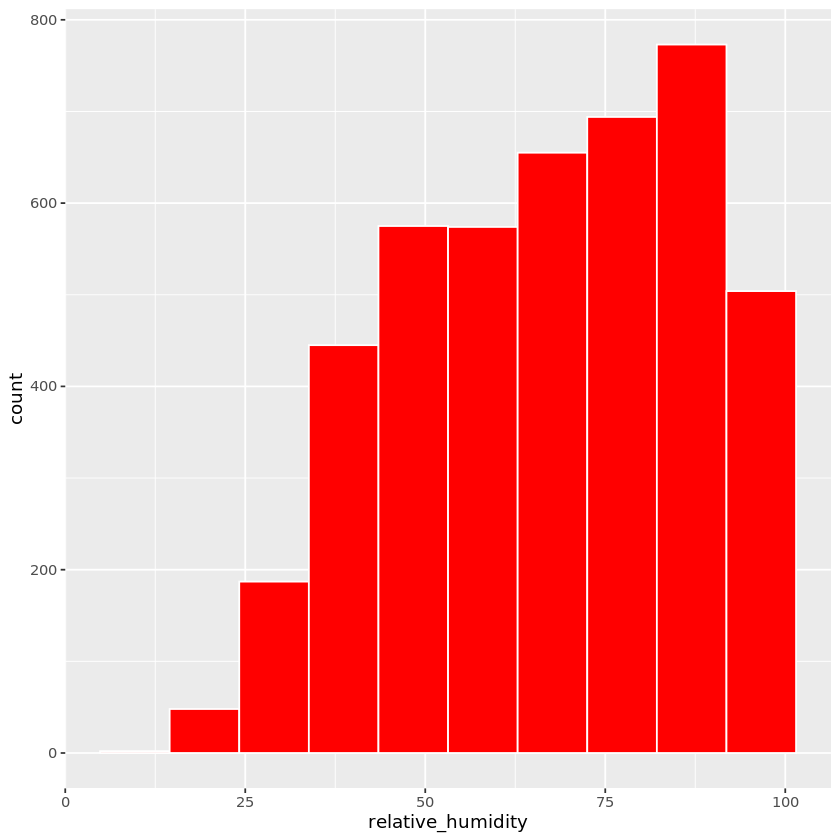

In [17]:
# relative_humidity
ggplot(data = train_data, mapping = aes(x = relative_humidity)) +
  geom_histogram(bins = 10, color = "white", fill = "red") +
  coord_cartesian(xlim = NULL)

Warning message:
“Removed 125 rows containing non-finite values (stat_bin).”

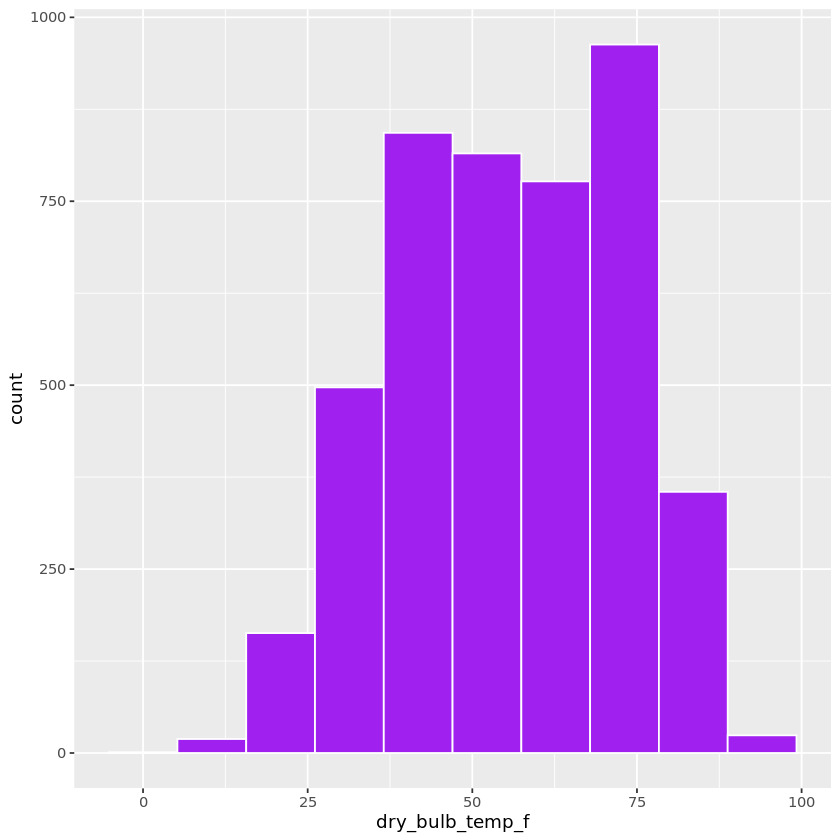

In [18]:
# dry_bulb_temp_f
ggplot(data = train_data, mapping = aes(x = dry_bulb_temp_f)) +
  geom_histogram(bins = 10, color = "white", fill = "purple") +
  coord_cartesian(xlim = NULL)

Warning message:
“Removed 1343 rows containing non-finite values (stat_bin).”

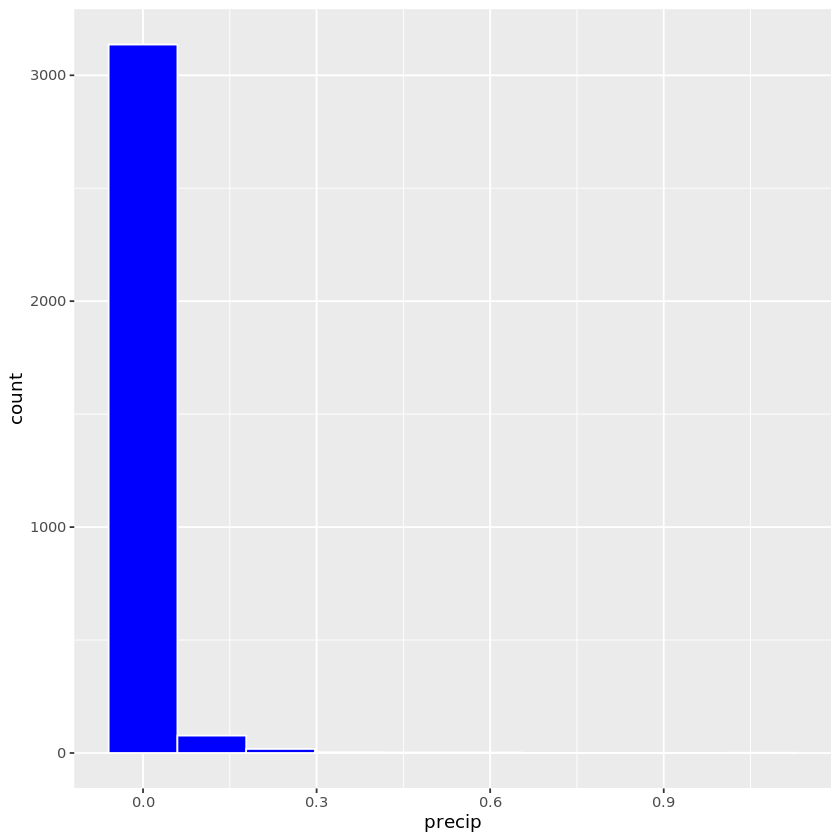

In [19]:
# precip
ggplot(data = train_data, mapping = aes(x = precip)) +
  geom_histogram(bins = 10, color = "white", fill = "blue") +
  coord_cartesian(xlim = NULL)

Warning message:
“Removed 130 rows containing non-finite values (stat_bin).”

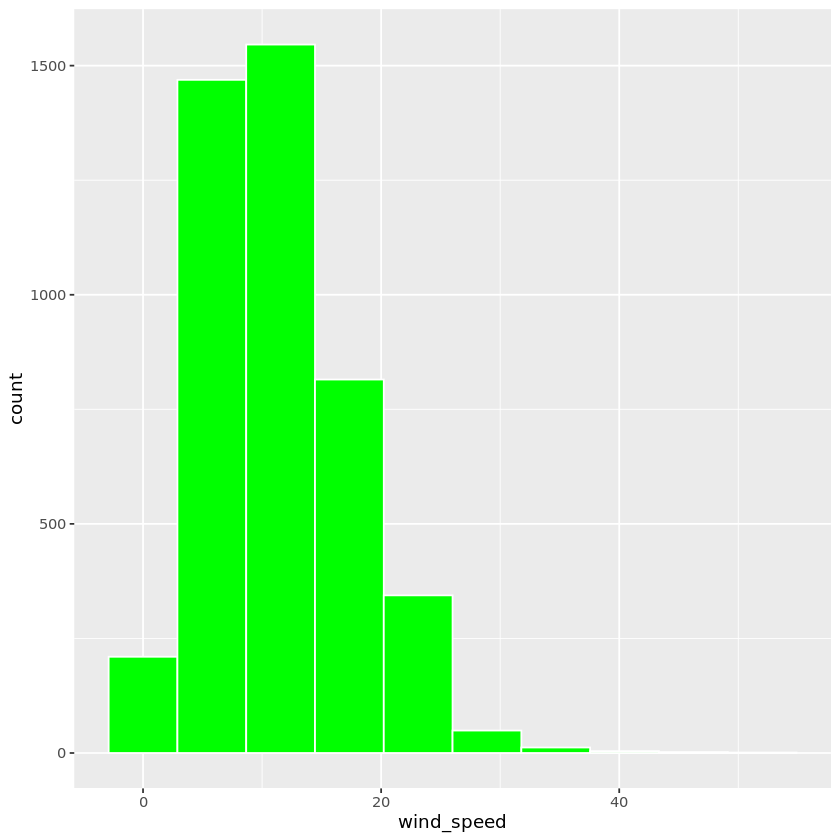

In [20]:
# wind_speed
ggplot(data = train_data, mapping = aes(x = wind_speed)) +
  geom_histogram(bins = 10, color = "white", fill = "green") +
  coord_cartesian(xlim = NULL)

Warning message:
“Removed 132 rows containing non-finite values (stat_bin).”

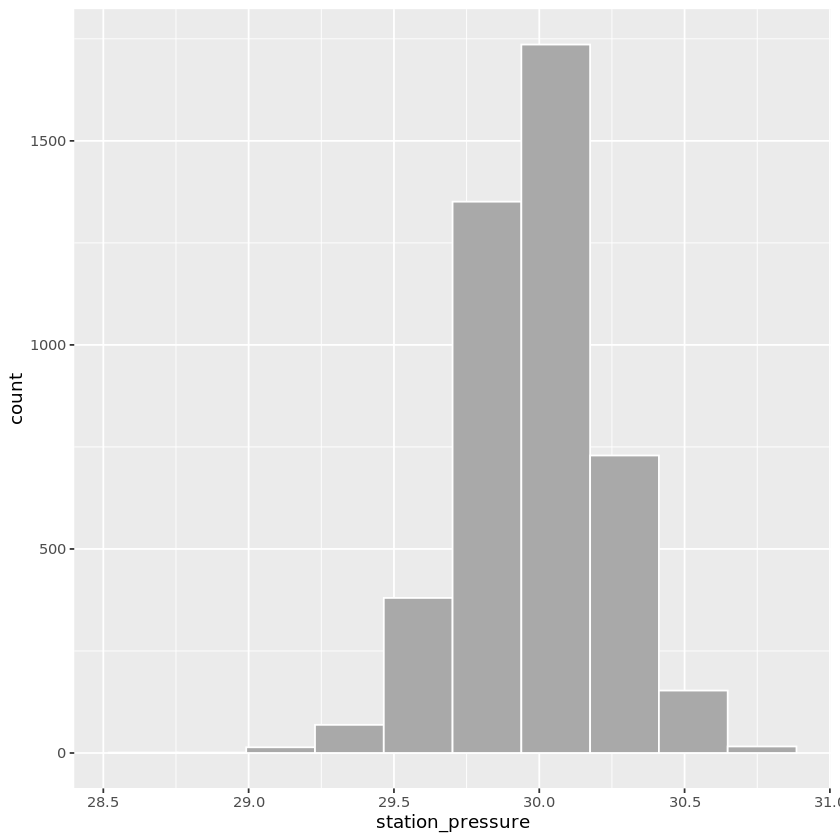

In [21]:
# station_pressure
ggplot(data = train_data, mapping = aes(x = station_pressure)) +
  geom_histogram(bins = 10, color = "white", fill = "dark gray") +
  coord_cartesian(xlim = NULL)

<a id="cell8"></a>
## 8. Linear Regression 
After exploring the dataset more, you are now ready to start creating models to predict the precipitation (`precip`).

Create simple linear regression models where `precip` is the response variable and each of `relative_humidity`, `dry_bulb_temp_f`,`wind_speed` or `station_pressure` will be a predictor variable, e.g. `precip ~ relative_humidity`, `precip ~ dry_bulb_temp_f`, etc. for a total of four simple models. 
Additionally, visualize each simple model with a scatter plot.


`geom_smooth()` using formula 'y ~ x'
Warning message:
“Removed 1343 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1343 rows containing missing values (geom_point).”

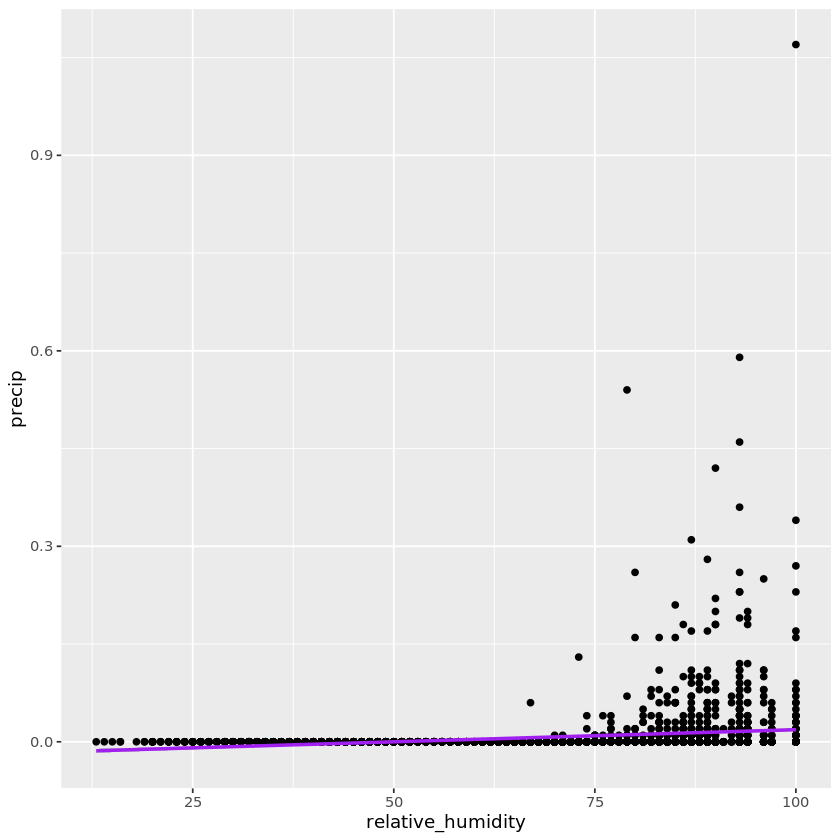

In [22]:
lm_humidity <- lm(precip ~ relative_humidity, data = train_data)

ggplot(train_data, aes(x = relative_humidity, y = precip)) +
geom_point() +
stat_smooth(method = "lm", col = "purple")

In [23]:
summary(lm_humidity)


Call:
lm(formula = precip ~ relative_humidity, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.01858 -0.01040 -0.00445  0.00188  1.05142 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -1.862e-02  2.116e-03  -8.801   <2e-16 ***
relative_humidity  3.720e-04  3.067e-05  12.129   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0347 on 3237 degrees of freedom
  (1343 observations deleted due to missingness)
Multiple R-squared:  0.04347,	Adjusted R-squared:  0.04318 
F-statistic: 147.1 on 1 and 3237 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula 'y ~ x'
Warning message:
“Removed 1343 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1343 rows containing missing values (geom_point).”

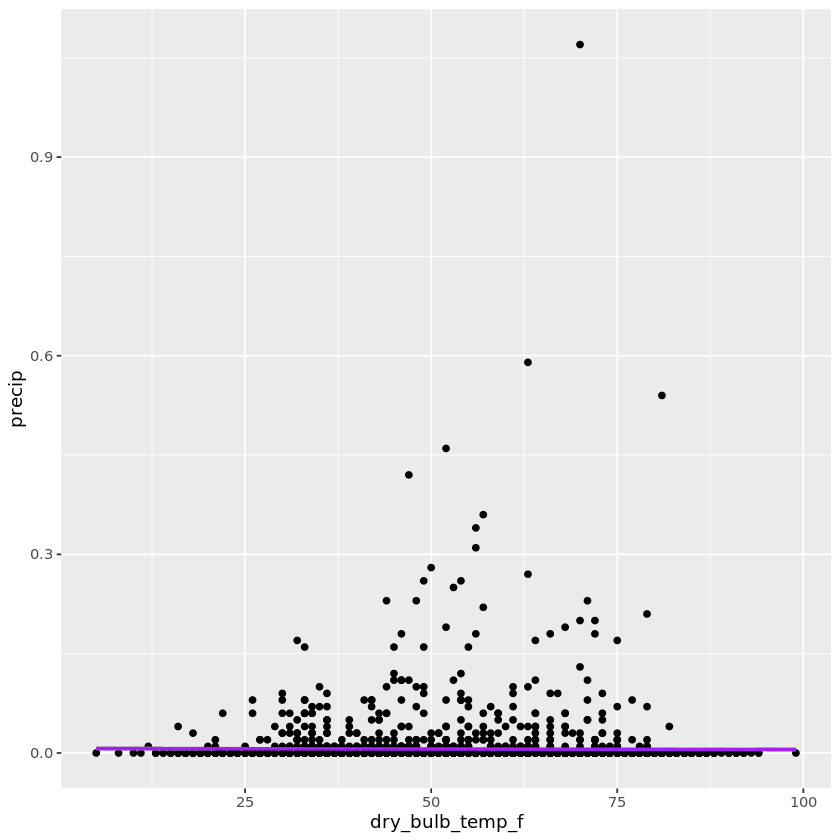

In [24]:
lm_drybulbtempf <- lm(precip ~ dry_bulb_temp_f, data = train_data)

ggplot(train_data, aes(x = dry_bulb_temp_f, y = precip)) +
geom_point() +
stat_smooth(method = "lm", col = "purple")

In [25]:
summary(lm_drybulbtempf)


Call:
lm(formula = precip ~ dry_bulb_temp_f, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.00676 -0.00614 -0.00588 -0.00564  1.06428 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)   
(Intercept)      6.838e-03  2.100e-03   3.256  0.00114 **
dry_bulb_temp_f -1.594e-05  3.610e-05  -0.442  0.65876   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03548 on 3237 degrees of freedom
  (1343 observations deleted due to missingness)
Multiple R-squared:  6.026e-05,	Adjusted R-squared:  -0.0002487 
F-statistic: 0.1951 on 1 and 3237 DF,  p-value: 0.6588


`geom_smooth()` using formula 'y ~ x'
Warning message:
“Removed 1343 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1343 rows containing missing values (geom_point).”

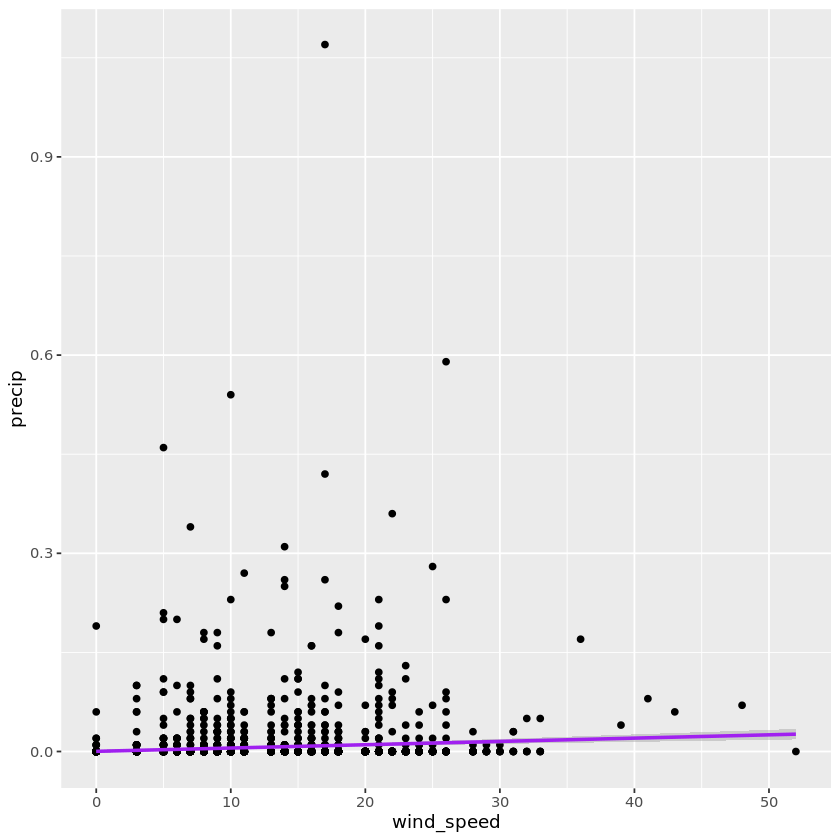

In [26]:
lm_windspeed <- lm(precip ~ wind_speed, data = train_data)

ggplot(train_data, aes(x = wind_speed, y = precip)) +
geom_point() +
stat_smooth(method = "lm", col = "purple")

In [27]:
summary(lm_windspeed)


Call:
lm(formula = precip ~ wind_speed, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.02627 -0.00728 -0.00478 -0.00328  1.06122 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.874e-04  1.281e-03   0.224    0.822    
wind_speed  4.996e-04  9.878e-05   5.058 4.48e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03534 on 3237 degrees of freedom
  (1343 observations deleted due to missingness)
Multiple R-squared:  0.00784,	Adjusted R-squared:  0.007534 
F-statistic: 25.58 on 1 and 3237 DF,  p-value: 4.481e-07


`geom_smooth()` using formula 'y ~ x'
Warning message:
“Removed 1347 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1347 rows containing missing values (geom_point).”

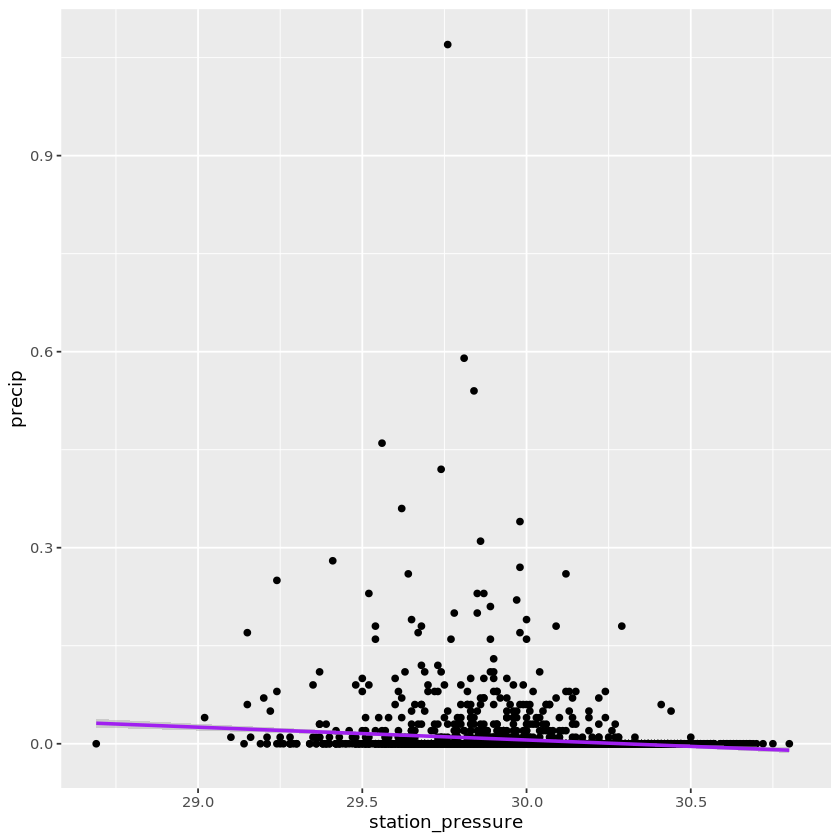

In [28]:
lm_stationpressure <- lm(precip ~ station_pressure, data = train_data)

ggplot(train_data, aes(x = station_pressure, y = precip)) +
geom_point() +
stat_smooth(method = "lm", col = "purple")

In [29]:
summary(lm_stationpressure)


Call:
lm(formula = precip ~ station_pressure, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.03142 -0.00812 -0.00538 -0.00166  1.05953 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.593054   0.077188   7.683 2.04e-14 ***
station_pressure -0.019576   0.002574  -7.607 3.67e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03519 on 3233 degrees of freedom
  (1347 observations deleted due to missingness)
Multiple R-squared:  0.01758,	Adjusted R-squared:  0.01728 
F-statistic: 57.86 on 1 and 3233 DF,  p-value: 3.667e-14


<a id="cell9"></a>
## 9. Improve the Model
Now, try improving the simple models you created in the previous section. 

Create at least two more models, each model should use at least one of the different techniques:
1. Add more features/predictors
2. Add regularization (L1, L2 or a mix)
3. Add a polynomial component

Also, for each of the models you create, check the model performance using the **training set** and a metric like MSE, RMSE, or R-squared.

Consider using `tidymodels` if you choose to add regularization and tune lambda.


Warning message:
“Removed 1343 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1343 rows containing missing values (geom_point).”

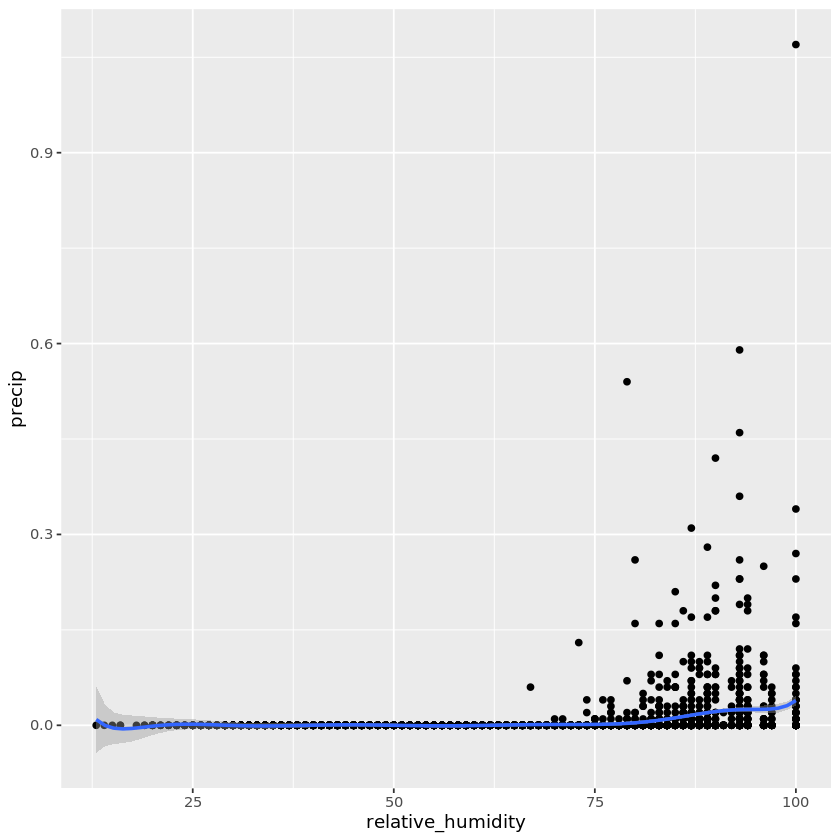

In [39]:
# based on results, since the model lm_humidity performed better(r-squared was better out of the four), but wasn't linear, let's use a polynomial component on it.

poly_humidity <- lm(precip ~ poly(relative_humidity, 10, raw = T), data = train_data)

ggplot(data = train_data, aes(relative_humidity, precip)) +
geom_point() +
geom_smooth(method = "lm", formula = y ~ poly(x, 10))

In [40]:
summary(poly_humidity) 


Call:
lm(formula = precip ~ poly(relative_humidity, 10, raw = T), data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.03895 -0.00307 -0.00074  0.00035  1.03105 

Coefficients:
                                         Estimate Std. Error t value Pr(>|t|)  
(Intercept)                             2.789e+00  2.592e+00   1.076   0.2820  
poly(relative_humidity, 10, raw = T)1  -7.269e-01  6.379e-01  -1.140   0.2546  
poly(relative_humidity, 10, raw = T)2   8.034e-02  6.678e-02   1.203   0.2290  
poly(relative_humidity, 10, raw = T)3  -4.982e-03  3.936e-03  -1.266   0.2056  
poly(relative_humidity, 10, raw = T)4   1.929e-04  1.453e-04   1.327   0.1844  
poly(relative_humidity, 10, raw = T)5  -4.890e-06  3.525e-06  -1.387   0.1654  
poly(relative_humidity, 10, raw = T)6   8.259e-08  5.714e-08   1.445   0.1484  
poly(relative_humidity, 10, raw = T)7  -9.206e-10  6.132e-10  -1.501   0.1334  
poly(relative_humidity, 10, raw = T)8   6.502e-12  4.182e-12   1.555   0.12

`geom_smooth()` using formula 'y ~ x'
Warning message:
“Removed 1347 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1347 rows containing missing values (geom_point).”

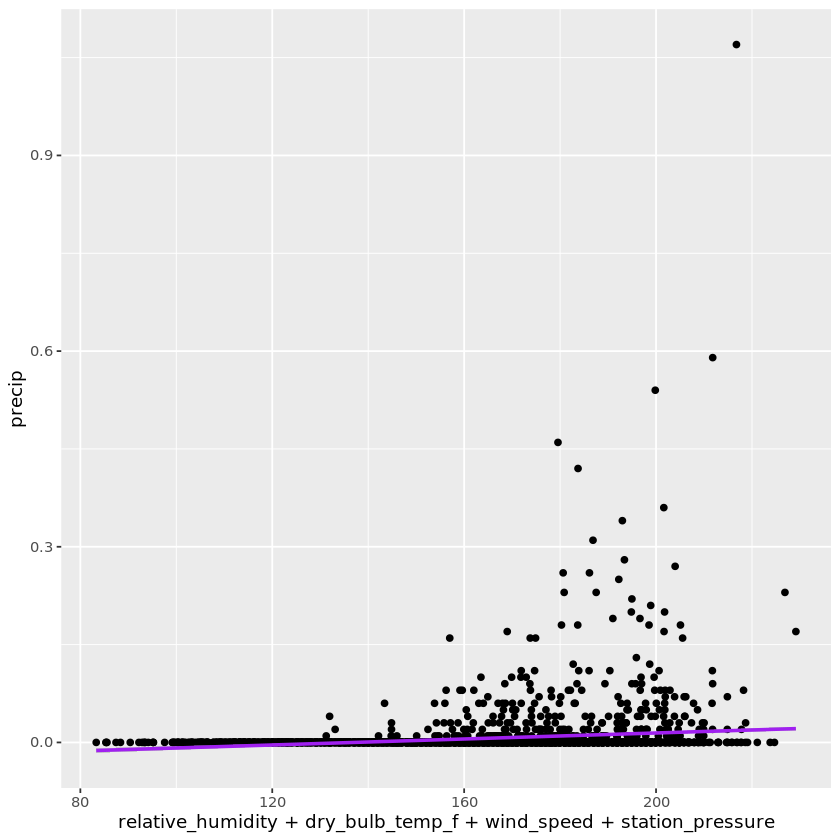

In [43]:
# now, let's create a mlr to attempt to create a more accurate predictor variable by adding more factors
mlr <- lm(precip ~ ., data = train_data)

ggplot(train_data, aes(x = relative_humidity + dry_bulb_temp_f + wind_speed + station_pressure, y = precip)) + 
geom_point() + 
stat_smooth(method = "lm", col = "purple")

In [44]:
summary(mlr)


Call:
lm(formula = precip ~ ., data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.05086 -0.00980 -0.00395  0.00217  1.04506 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        1.612e-01  8.754e-02   1.841   0.0657 .  
relative_humidity  4.098e-04  3.335e-05  12.287  < 2e-16 ***
dry_bulb_temp_f   -3.434e-05  3.655e-05  -0.939   0.3476    
wind_speed         7.258e-04  1.087e-04   6.679 2.82e-11 ***
station_pressure  -6.288e-03  2.860e-03  -2.199   0.0280 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03435 on 3230 degrees of freedom
  (1347 observations deleted due to missingness)
Multiple R-squared:  0.06468,	Adjusted R-squared:  0.06353 
F-statistic: 55.84 on 4 and 3230 DF,  p-value: < 2.2e-16


<a id="cell10"></a>
## 10. Find Best Model
Compare the regression metrics of each model from section 9 to find the best model overall. To do this, 

1. Evaluate the models on the **testing set** using at least one metric (like MSE, RMSE or R-squared).
2. After calculating the metrics on the testing set for each model, print them out in as a table to easily compare. You can use something like:
```
model_names <- c("model_1", "model_2", "model_3")
train_error <- c("model_1_value", "model_2_value", "model_3_value")
test_error <- c("model_1_value", "model_2_value", "model_3_value")
comparison_df <- data.frame(model_names, train_error, test_error)
```
3. Finally, from the comparison table you create, conclude which model performed the best.


In [45]:
# the best model.
# To do this let's use the metric R-squared. 
# As this shows the proportion of the variation in the dependent variable that is predictable from the independent variable(s).

In [46]:
# mlr model
mlr_model <- linear_reg() %>%
    set_engine(engine = 'lm')

train_fit <- mlr_model %>%
    fit(precip ~ relative_humidity + dry_bulb_temp_f + wind_speed + station_pressure, data = train_data)

mlr_results <- train_fit %>%
    predict(new_data = test_data) %>%
    mutate(truth = test_data$precip)

In [47]:
head(mlr_results)

.pred,truth
<dbl>,<dbl>
-0.005464291,0.00
0.016435682,0.00
0.004114842,0.00
0.015341710,0.06
0.013411806,0.00
0.006033824,NA


In [48]:
poly_model <- linear_reg() %>%
    set_engine(engine = "lm")

train_fit2 <- poly_model %>%
    fit(precip ~ poly(relative_humidity, 10, raw = T), data = train_data)

poly_model_results <- train_fit2 %>%
    predict(new_data = test_data) %>%
    mutate(truth = test_data$precip)

In [49]:
head(poly_model_results)

.pred,truth
<dbl>,<dbl>
0.0004277933,0.00
0.0199384690,0.00
0.0007113248,0.00
0.0216566127,0.06
0.0012733973,0.00
0.0014125771,NA


In [51]:
# calculate r^2 for mlr
rsq_mlr <- rsq(mlr_results, truth, estimate = .pred)
rsq_mlr

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.04909246


In [52]:
# calculate r^2 for poly_model
rsq_poly_model <- rsq(poly_model_results, truth, estimate = .pred)
rsq_poly_model

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.05295151


In [55]:
# Finally, from the comparison table you create, conclude which model performed the best.
model_names <- c("poly_relative_humidity", "MLR")
train_error <- c("0.0748", "0.06468")
test_error <- c("0.05295151", "0.04909246")

In [56]:
comparison_df <- data.frame(model_names, train_error, test_error)
comparison_df

model_names,train_error,test_error
<fct>,<fct>,<fct>
poly_relative_humidity,0.0748,0.05295151
MLR,0.06468,0.04909246


The results of the R-squared showed the 10th order polynomial regression model of relative_humidity to be the better model.
As it has a greater R-squared value for both the training and testing data.

## Author(s)

<h4> Yiwen Li </h4>

## Contributions

<h4> Tiffany Zhu </h4>

## <h3 align="center"> © IBM Corporation 2021. All rights reserved. <h3/>
